In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 609M/612M [00:26<00:00, 24.7MB/s]
100% 612M/612M [00:26<00:00, 23.8MB/s]


In [ ]:
!unzip /content/gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


 **Importing the necessary libraries**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pickle
import random 
import pandas as pd
import cv2

In [ ]:
!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


In [ ]:
np.random.seed(0)
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    valid_data = pickle.load(f)

In [ ]:
import pandas as pd
df = pd.read_csv('german-traffic-signs/signnames.csv')
df

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pickle
import random 
import pandas as pd
import cv2

**Load the Train, Test and Validation dataset**

In [ ]:
np.random.seed(0)
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    valid_data = pickle.load(f)

In [ ]:
train_x, train_y = train_data['features'],train_data['labels']
val_x, val_y = valid_data['features'],valid_data['labels']
test_x,test_y = test_data['features'],test_data['labels']

print('Train data shape',train_x.shape,'Train data label',train_y.shape)
print('Test data shape',test_x.shape,'Test data label',test_y.shape)
print('valid data shape',val_x.shape,'Valid data label',val_y.shape)

Train data shape (34799, 32, 32, 3) Train data label (34799,)
Test data shape (12630, 32, 32, 3) Test data label (12630,)
valid data shape (4410, 32, 32, 3) Valid data label (4410,)


**Deriving number of samples from each class in training dataset**

In [ ]:
import os
num_samples = []
for i in range(len(df)):
    file_count = len(os.listdir('/content/Train/'+str(i)+'/'))
    num_samples.append(file_count)
print(len(num_samples))

43


In [ ]:
print(num_samples)

[210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240]


 **Plotting the histogram graph for the num_samples**

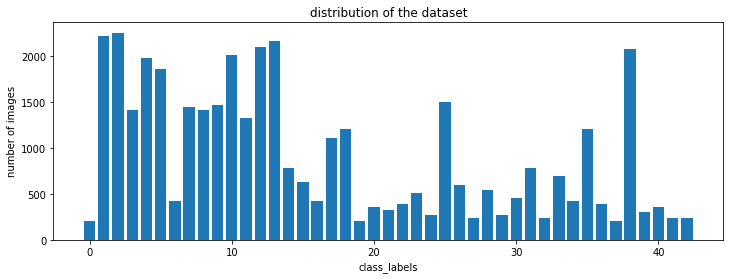

In [ ]:
# We implement the distribution of the dataset
plt.figure(figsize=(12,4))
plt.bar(range(0, len(df)), num_samples)
plt.title('distribution of the dataset')
plt.xlabel('class_labels')
plt.ylabel('number of images')
plt.show()

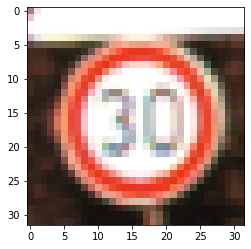

In [ ]:
plt.imshow(train_x[3000])

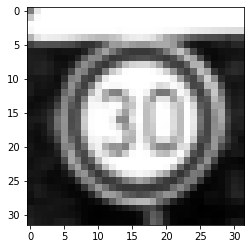

In [ ]:
def grayscale(image):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return image

img = grayscale(train_x[3000])
plt.imshow(img, cmap = plt.get_cmap('gray'))

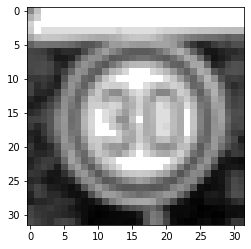

In [ ]:
#Equalization is done to convert to gray scale images.
def equalize(image):
    image = cv2.equalizeHist(image)
    return image
img = equalize(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
def processing(image):
    gray_img = grayscale(image)
    img = equalize(gray_img) 
    img = img/255
    return img

In [ ]:
train_x = np.asarray(list(map(processing, train_x)))
val_x = np.asarray(list(map(processing, val_x)))
test_x = np.asarray(list(map(processing, test_x)))

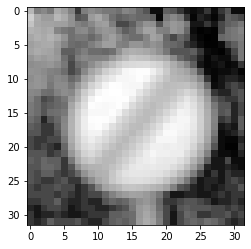

In [ ]:
plt.imshow(train_x[random.randint(0, len(train_x-1))],cmap=plt.get_cmap('gray'))

In [ ]:
train_x.shape[0]

34799

In [ ]:
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
val_x = val_x.reshape(val_x.shape[0],val_x.shape[1],val_x.shape[2],1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],test_x.shape[2],1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
datagen.fit(train_x)
#batches = datagen.flow(train_x,train_y,batch_size=15)

In [ ]:
train_y = to_categorical(train_y,43)
test_y = to_categorical(test_y,43)
val_y = to_categorical(val_y,43)

In [ ]:
from keras.layers import ReLU
def build_model():
    model = Sequential()
    model.add(Conv2D(60,(5,5),input_shape=(train_x.shape[1],train_x.shape[2],train_x.shape[3])))
    model.add(ReLU())
    model.add(Conv2D(60,(5,5)))
    model.add(ReLU())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(30,(3,3)))
    model.add(ReLU())
    model.add(Conv2D(30,(3,3)))
    model.add(ReLU())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(df['ClassId']),activation='softmax'))
    
    model.compile(Adam(lr=0.001), loss="categorical_crossentropy",metrics=["accuracy"])
    return model

In [ ]:
model = build_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 re_lu (ReLU)                (None, 28, 28, 60)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 re_lu_1 (ReLU)              (None, 24, 24, 60)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(datagen.flow(train_x,train_y,batch_size=64),
                             steps_per_epoch=150,
                             epochs=15,
                             validation_data=(val_x,val_y),shuffle=1)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


150/150 [==============================] - 17s 56ms/step - loss: 3.1212 - accuracy: 0.1622 - val_loss: 1.8800 - val_accuracy: 0.4864
Epoch 2/15
150/150 [==============================] - 4s 26ms/step - loss: 1.7867 - accuracy: 0.4754 - val_loss: 0.8082 - val_accuracy: 0.7615
Epoch 3/15
150/150 [==============================] - 4s 27ms/step - loss: 1.2081 - accuracy: 0.6353 - val_loss: 0.4770 - val_accuracy: 0.8503
Epoch 4/15
150/150 [==============================] - 4s 27ms/step - loss: 0.8792 - accuracy: 0.7291 - val_loss: 0.3126 - val_accuracy: 0.9034
Epoch 5/15
150/150 [==============================] - 4s 25ms/step - loss: 0.6879 - accuracy: 0.7921 - val_loss: 0.1701 - val_accuracy: 0.9531
Epoch 6/15
150/150 [==============================] - 4s 26ms/step - loss: 0.5661 - accuracy: 0.8277 - val_loss: 0.2092 - val_accuracy: 0.9367
Epoch 7/15
150/150 [==============================] - 4s 27ms/step - loss: 0.4638 - accuracy: 0.8573 - val_loss: 0.1185 - val_accuracy: 0.9662
Epoch 8/1

Text(0, 0.5, 'loss')

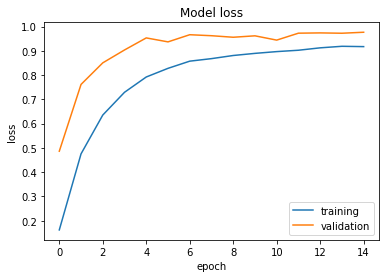

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

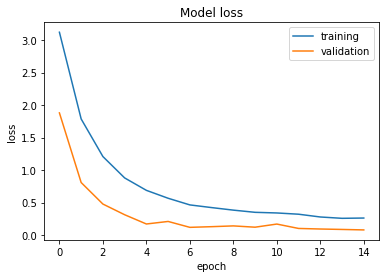

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
score = model.evaluate(test_x, test_y , verbose = 0)
print("The test score is: ",score[0])
print("The Accuracy score is: ",score[1])

The test score is:  0.14490951597690582
The Accuracy score is:  0.9568488001823425
